<a href="https://colab.research.google.com/github/ArmanAsibor/Armanasibor/blob/main/coursework_CN5021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Volume Analysis – Region 6 (London)

This notebook explores Department for Transport (DfT) traffic data for Region 6 (London).
We will:
- Load open-source traffic count datasets (CSV),
- Clean and merge them into a useful analysis table,
- Analyse traffic patterns by year, direction, and vehicle type,
- Generate visual reports (charts) that can be used in our main project report.


In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

# Display all columns when inspecting
pd.set_option('display.max_columns', None)

# ---- Load the core datasets ----
aadf_dir = pd.read_csv("dft_aadfbydirection_region_id_6.csv")
raw = pd.read_csv("dft_rawcount_region_id_6.csv")   # optional, for hourly patterns

aadf_dir


/tmp/ipython-input-385806588.py:10: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  aadf_dir = pd.read_csv("dft_aadfbydirection_region_id_6.csv")
/tmp/ipython-input-385806588.py:11: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("dft_rawcount_region_id_6.csv")   # optional, for hourly patterns


,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,estimation_method,estimation_method_detailed,direction_of_travel,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6000,2000,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,N,0,454,17416,255,3316,544,52,152,170,315,208,1441,22882
1,6000,2000,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,S,0,368,14783,211,2508,475,39,104,108,278,166,1170,19040
2,6000,2001,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,N,0,391,19090,245,3572,635,84,125,181,293,231,1549,24847
3,6000,2001,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,S,0,399,19333,234,3063,602,73,153,104,233,340,1505,24534
4,6000,2002,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,N,0,252,18862,200,2848,628,97,160,132,295,206,1518,23680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98693,999994,2007,6,London,134,Croydon,U,Minor,NaN,NaN,531750,165000,51.368786,-0.108705,NaN,NaN,Estimated,Estimated using AADF from previous year on thi...,S,5,13,1576,20,183,7,0,0,0,0,0,7,1799
98694,999994,2008,6,London,134,Croydon,U,Minor,NaN,NaN,531750,165000,51.368786,-0.108705,NaN,NaN,Counted,Manual count,E,3,7,1706,25,168,25,0,0,0,0,0,25,1931
98695,999994,2008,6,London,134,Croydon,U,Minor,NaN,NaN,531750,165000,51.368786,-0.108705,NaN,NaN,Counted,Manual count,W,5,3,62,1,4,0,0,0,0,0,0,0,70
98696,999994,2009,6,London,134,Croydon,U,Minor,NaN,NaN,531750,165000,51.368786,-0.108705,NaN,NaN,Counted,Manual count,E,2,29,1621,23,156,3,1,0,0,0,2,6,1835


In [7]:
aadf_dir.info()
aadf_dir.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98698 entries, 0 to 98697
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   count_point_id                98698 non-null  int64  
 1   year                          98698 non-null  int64  
 2   region_id                     98698 non-null  int64  
 3   region_name                   98698 non-null  object 
 4   local_authority_id            98698 non-null  int64  
 5   local_authority_name          98698 non-null  object 
 6   road_name                     98698 non-null  object 
 7   road_type                     98698 non-null  object 
 8   start_junction_road_name      83954 non-null  object 
 9   end_junction_road_name        83953 non-null  object 
 10  easting                       98698 non-null  int64  
 11  northing                      98698 non-null  int64  
 12  latitude                      98698 non-null  float64
 13  l

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,estimation_method,estimation_method_detailed,direction_of_travel,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6000,2000,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,N,0,454,17416,255,3316,544,52,152,170,315,208,1441,22882
1,6000,2000,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,S,0,368,14783,211,2508,475,39,104,108,278,166,1170,19040
2,6000,2001,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,N,0,391,19090,245,3572,635,84,125,181,293,231,1549,24847
3,6000,2001,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,S,0,399,19333,234,3063,602,73,153,104,233,340,1505,24534
4,6000,2002,6,London,57,Barnet,M1,Major,A406,M1 spur,522170,189100,51.587522,-0.237927,4.1,2.55,Counted,Manual count,N,0,252,18862,200,2848,628,97,160,132,295,206,1518,23680


In [13]:
# Select a clean subset
cols_keep = [
    'count_point_id', 'year', 'region_name', 'local_authority_name',
    'road_name', 'road_type', 'direction_of_travel',
    'latitude', 'longitude',
    'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs',
    'all_motor_vehicles'
]

traffic = aadf_dir[cols_keep].copy()

traffic.head()


,count_point_id,year,region_name,local_authority_name,road_name,road_type,direction_of_travel,latitude,longitude,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,6000,2000,London,Barnet,M1,Major,N,51.587522,-0.237927,17416,255,3316,1441,22882
1,6000,2000,London,Barnet,M1,Major,S,51.587522,-0.237927,14783,211,2508,1170,19040
2,6000,2001,London,Barnet,M1,Major,N,51.587522,-0.237927,19090,245,3572,1549,24847
3,6000,2001,London,Barnet,M1,Major,S,51.587522,-0.237927,19333,234,3063,1505,24534
4,6000,2002,London,Barnet,M1,Major,N,51.587522,-0.237927,18862,200,2848,1518,23680


In [22]:
# check for null values
print(traffic.isna().sum())
print(traffic['year'].unique())
print(traffic['road_type'].value_counts(dropna=False).head())


count_point_id          0
year                    0
region_name             0
local_authority_name    0
road_name               0
road_type               0
direction_of_travel     0
latitude                0
longitude               0
cars_and_taxis          0
buses_and_coaches       0
lgvs                    0
all_hgvs                0
all_motor_vehicles      0
dtype: int64
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
road_type
Major    83988
Minor    14710
Name: count, dtype: int64


In [24]:
# Drop missing values as it doesn't affect analysis
traffic = traffic.dropna(subset=['all_motor_vehicles'])


# Insight 1


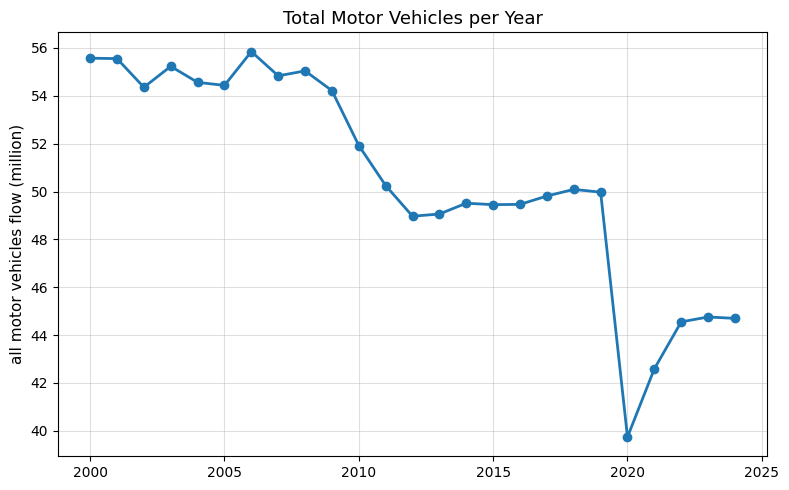

,year,all_motor_vehicles
0,2000,55572506
1,2001,55553417
2,2002,54356983
3,2003,55230556
4,2004,54561588


In [31]:
yearly_total = traffic.groupby('year')['all_motor_vehicles'].sum().reset_index()

plt.figure(figsize=(8,5))

# Convert Y values: millions × 10
y_values = (yearly_total['all_motor_vehicles'] / 1_000_000)

plt.plot(
    yearly_total['year'],
    y_values,
    marker='o',
    linewidth=2
)

plt.title("Total Motor Vehicles per Year", fontsize=13)

# REMOVE x-label
plt.xlabel("")

# UPDATED y-label
plt.ylabel("All motor vehicles flow (million)", fontsize=11)

# Make sure y-axis does NOT switch to scientific notation
plt.ticklabel_format(style='plain')

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

yearly_total.head()


# Insight 2

In [38]:
vehicle_total = traffic[['cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']].sum()

vehicle_total

,0
cars_and_taxis,964542314
buses_and_coaches,35057827
lgvs,175131018
all_hgvs,49648573


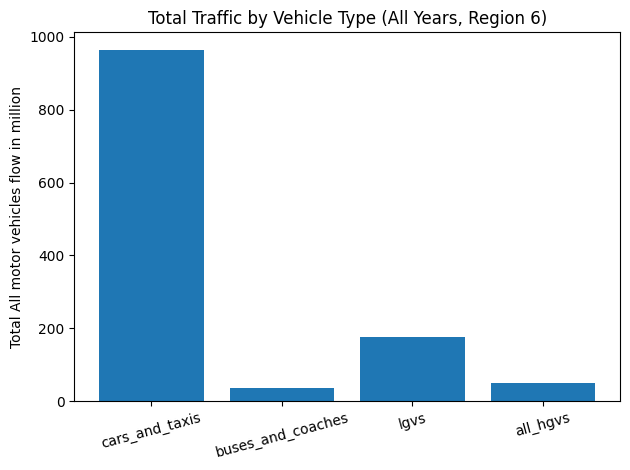

In [49]:
y_values2 = vehicle_total.values /1_000_000

plt.figure()
plt.bar(vehicle_total.index, y_values2)
plt.title("Total Traffic by Vehicle Type (All Years, Region 6)")
plt.xlabel("")
plt.ylabel("Total All motor vehicles flow in million")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Insight 3 – Road Type vs Traffic Volume

Which road types carry the most vehicles?

In [50]:
roadtype_total = traffic.groupby('road_type')['all_motor_vehicles'].sum().reset_index().sort_values('all_motor_vehicles', ascending=False)

roadtype_total


,road_type,all_motor_vehicles
0,Major,1223698075
1,Minor,40772791


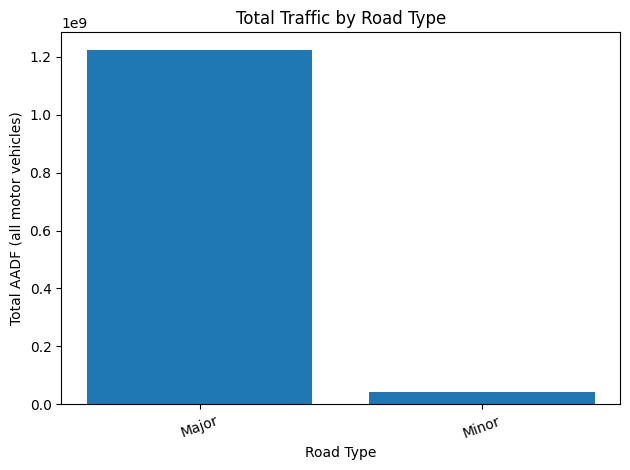

In [51]:
plt.figure()
plt.bar(roadtype_total['road_type'], roadtype_total['all_motor_vehicles'])
plt.title("Total Traffic by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Total AADF (all motor vehicles)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
